In [1]:
import numpy as np
from scipy import signal, fft, interpolate
import matplotlib.pyplot as plt

Text(0, 0.5, 'Magnitude')

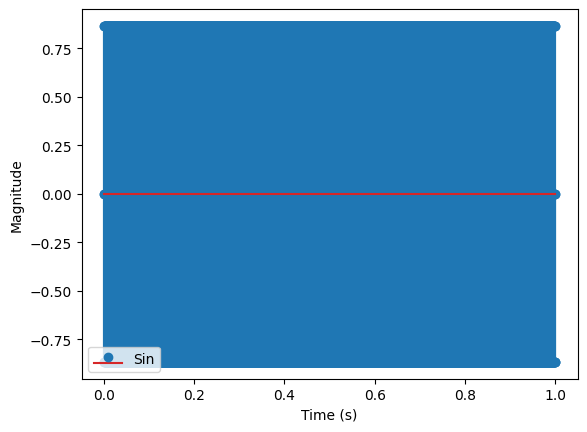

In [2]:
Fs = 6e3
f = 2e3
n = np.arange(0, 1, 1/Fs)
x = np.sin(2*np.pi*f*n)
plt.figure()
plt.stem(n, x, label="Sin")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Magnitude")

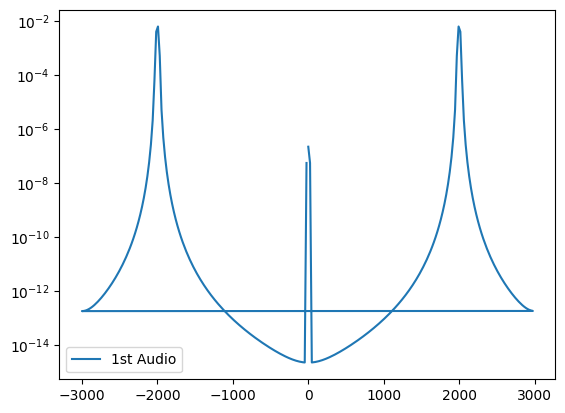

In [3]:
xf, yp = signal.welch(x, Fs, return_onesided=False)
plt.figure()
plt.semilogy(xf, yp, label="1st Audio")
plt.legend()
plt.show()

(60000,)


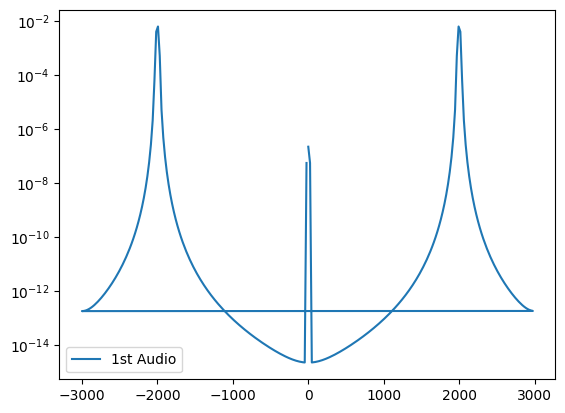

In [4]:
# Resampling signal
U = 10 # Upsampling factor
x_resampled = signal.resample_poly(x, U, 1)
print(x_resampled.shape)
x_resampled, y_resampled = signal.welch(x, Fs, return_onesided=False)
plt.figure()
plt.semilogy(x_resampled, y_resampled, label="1st Audio")
plt.legend()
plt.show()

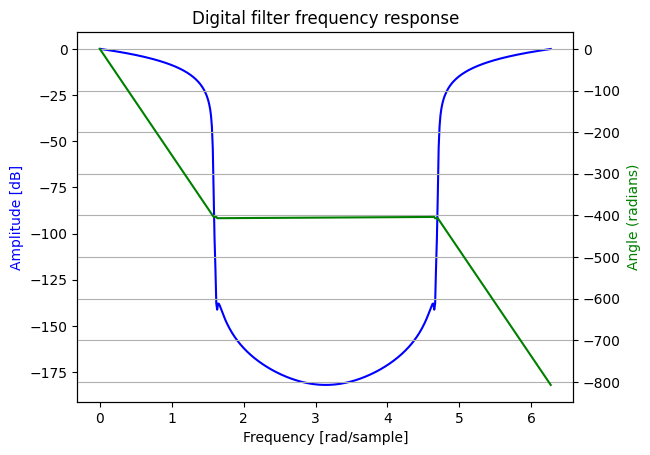

In [5]:
f = np.array([0, 0.250, 0.500, 0.7500, 1])
a = np.array([1.0000, 0.500, 0, 0, 0])
nf = 512
b = signal.firwin2(nf-1,f,a)

w, h = signal.freqz(b,1,nf,whole=True)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()

In [6]:
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = interpolate.interp1d(x, y)

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

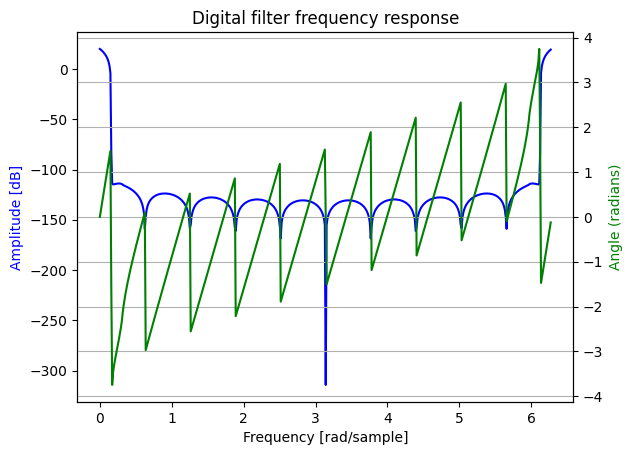

In [10]:
# y = interpolate_1d_vector(b, 10)
y = signal.resample(b, len(b)*10)
w, h = signal.freqz(y,1,nf,whole=True)
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid(True)
ax2.axis('tight')
plt.show()